# Horizonts modelling dataset

# Content

* [Cube 1](cube_1)
* [Cube 2](cube_2)
* [Cube 3](cube_3)
* [Cube VU_ONGMK](cube_vu)

| Cube alias | Filename|  Size | Shape (ilines, xlines, height) | Size of labels |
| :------ | --- | ----: | ----: | ----: |
| CUBE_1 | E_anon.hdf5 | 21 GB | 2563, 1409, 1501 | 1.1 GB | 
| CUBE_2 | M_cube.hdf5 | 2.8 GB | 418, 869, 2001 | 0.07 GB |
| CUBE_3 | P_cube.hdf5 | 54 GB | 2737, 2599, 2001 | 0.68 GB |
| CUBE_VU_ONGMK | Repaired_cube.hdf5 | 8.2 GB | 1472, 1380, 1071 | 0.81 GB |

Each cube is located at `/notebooks/SEISMIC_DATA/` + `cube alias` + `filename`

Labels for each cube are contained at `/notebooks/SEISMIC_DATA/` + `cube alias` + `HORIZONTS`

In [1]:
import sys
from tqdm import tqdm_notebook
from glob import glob
import matplotlib.pyplot as plt

sys.path.append('..')
from seismiqb.batchflow import L, D, Pipeline, FilesIndex
from seismiqb import SeismicCropBatch, SeismicGeometry, SeismicCubeset

<a id='cube_1'></a>
# Cube 1

In [2]:
%%time
path_data = '/notebooks/SEISMIC_DATA/CUBE_1/E_anon.hdf5'

dsi = FilesIndex(path=[path_data], no_ext=True)
ds = SeismicCubeset(dsi)

paths_txt = {ds.indices[0]: glob('/notebooks/SEISMIC_DATA/CUBE_1/HORIZONTS/*')}

ds = (ds.load_geometries()
        .load_point_clouds(paths = paths_txt)
        .load_labels()
        .load_samplers()
      )
# ~60 seconds

CPU times: user 48.9 s, sys: 8.46 s, total: 57.3 s
Wall time: 1min 2s


In [3]:
geometry = ds.geometries[ds.indices[0]]

print('Info for cube: {}'.format(geometry.path))
print('Time delay: {}'.format(geometry.delay))
print('Sample rate: {}'.format(geometry.sample_rate))

print('ILINES range from {} to {}'.format(min(geometry.ilines), max(geometry.ilines)))
print('ILINES range from {} to {}'.format(min(geometry.xlines), max(geometry.xlines)))
print('CDP_X range from {} to {}'.format(min(geometry.cdp_x), max(geometry.cdp_x)))
print('CDP_X range from {} to {}'.format(min(geometry.cdp_y), max(geometry.cdp_y)))

print('Cube shape (ilines, xlines, height) is: {}'.format(geometry.cube_shape))

Info for cube: /notebooks/SEISMIC_DATA/CUBE_1/E_anon.hdf5
Time delay: 50
Sample rate: 2
ILINES range from 24 to 2586
ILINES range from 19 to 1427
CDP_X range from 717115 to 752315
CDP_X range from 7150315 to 7214365
Cube shape (ilines, xlines, height) is: [2563, 1409, 1501]


Showing labels from above for E_anon


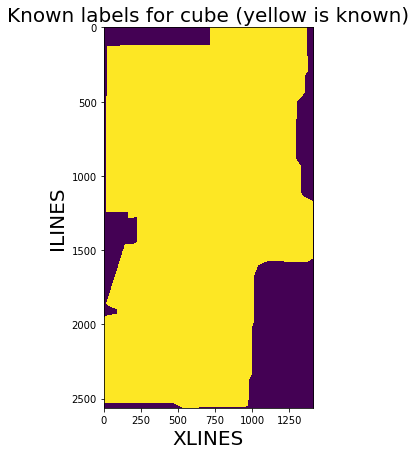

In [4]:
ds.show_labels(ds.indices[0])

In [5]:
demo_pipeline = (Pipeline()
                 .load_component(src=[D('geometries'), D('labels')],
                                 dst=['geometries', 'labels'])
                 .crop(points=L(ds.sampler.sample, 16),
                       shape=[3, 512, 512])
                 .load_cubes(dst='data_crops')
                 .create_masks(dst='mask_crops')
                 .scale(mode='normalize', src='data_crops')
                 )

demo_batch = (demo_pipeline << ds).next_batch(1, n_epochs=None)

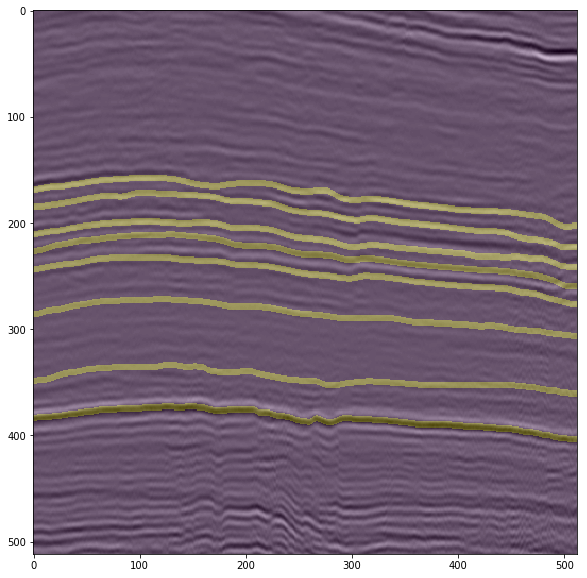

In [6]:
c = 4
plt.figure(figsize=(20,10))
plt.imshow(demo_batch.data_crops[c][0, :, :].T, cmap='gray')
plt.imshow(demo_batch.mask_crops[c][0, :, :].T, alpha=0.3)
plt.show()

This cube is the best one in terms of quality of labels/amount of labels.

<a id='cube_1'></a>
# Cube 2

In [7]:
%%time
path_data = '/notebooks/SEISMIC_DATA/CUBE_2/M_cube.hdf5'

dsi = FilesIndex(path=[path_data], no_ext=True)
ds = SeismicCubeset(dsi)

paths_txt = {ds.indices[0]: glob('/notebooks/SEISMIC_DATA/CUBE_2/HORIZONTS/*')}

ds = (ds.load_geometries()
        .load_point_clouds(paths = paths_txt)
        .load_labels()
        .load_samplers()
      )
# ~4 seconds

CPU times: user 3.56 s, sys: 248 ms, total: 3.81 s
Wall time: 4.16 s


In [8]:
geometry = ds.geometries[ds.indices[0]]

print('Info for cube: {}'.format(geometry.path))
print('Time delay: {}'.format(geometry.delay))
print('Sample rate: {}'.format(geometry.sample_rate))

print('ILINES range from {} to {}'.format(min(geometry.ilines), max(geometry.ilines)))
print('ILINES range from {} to {}'.format(min(geometry.xlines), max(geometry.xlines)))
print('CDP_X range from {} to {}'.format(min(geometry.cdp_x), max(geometry.cdp_x)))
print('CDP_X range from {} to {}'.format(min(geometry.cdp_y), max(geometry.cdp_y)))

print('Cube shape (ilines, xlines, height) is: {}'.format(geometry.cube_shape))

Info for cube: /notebooks/SEISMIC_DATA/CUBE_2/M_cube.hdf5
Time delay: 0
Sample rate: 2
ILINES range from 1084 to 1501
ILINES range from 558 to 1426
CDP_X range from 254049 to 276636
CDP_X range from 6875517 to 6887900
Cube shape (ilines, xlines, height) is: [418, 869, 2001]


Showing labels from above for M_cube


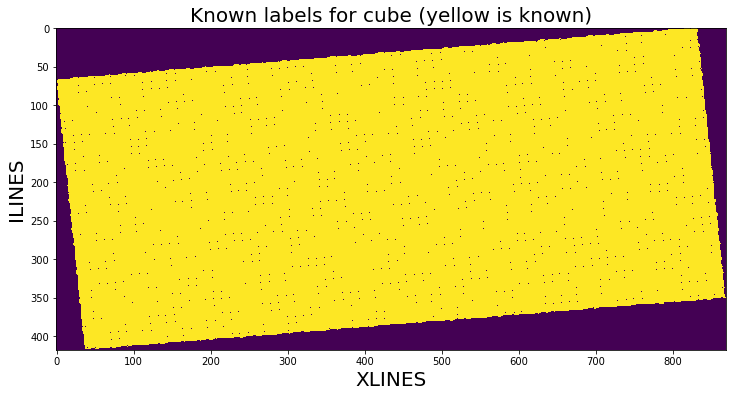

In [9]:
ds.show_labels(ds.indices[0])

In [10]:
demo_pipeline = (Pipeline()
                 .load_component(src=[D('geometries'), D('labels')],
                                 dst=['geometries', 'labels'])
                 .crop(points=L(ds.sampler.sample, 16),
                       shape=[3, 512, 512])
                 .load_cubes(dst='data_crops')
                 .create_masks(dst='mask_crops')
                 .scale(mode='normalize', src='data_crops')
                 )

demo_batch = (demo_pipeline << ds).next_batch(1, n_epochs=None)

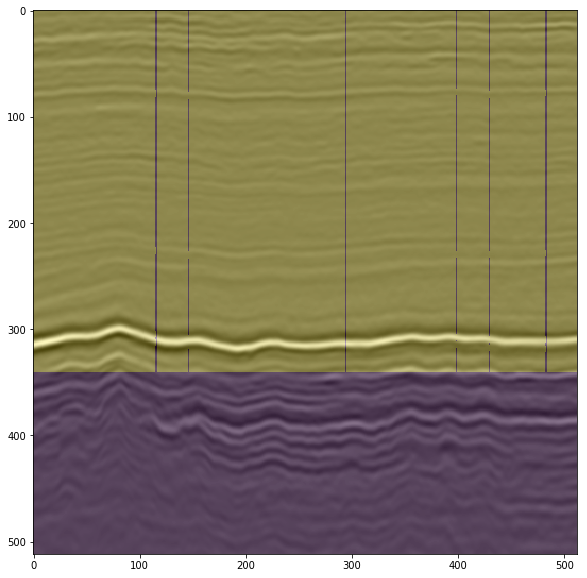

In [11]:
c = 2
plt.figure(figsize=(20,10))
plt.imshow(demo_batch.data_crops[c][0, :, :].T, cmap='gray')
plt.imshow(demo_batch.mask_crops[c][0, :, :].T, alpha=0.3)
plt.show()

Something is off with the connection between cube coordinates and labels coordinates. Despite that, cube is very small and amount of labels is even smaller, so this cube is usually held out for visual testing.

<a id='cube_3'></a>
# Cube 3

In [12]:
%%time
path_data = '/notebooks/SEISMIC_DATA/CUBE_3/P_cube.hdf5'

dsi = FilesIndex(path=[path_data], no_ext=True)
ds = SeismicCubeset(dsi)

paths_txt = {ds.indices[0]: glob('/notebooks/SEISMIC_DATA/CUBE_3/HORIZONTS/*')}

ds = (ds.load_geometries()
        .load_point_clouds(paths = paths_txt)
        .load_labels()
        .load_samplers()
      )
# ~43 seconds

CPU times: user 33.7 s, sys: 5.74 s, total: 39.4 s
Wall time: 43 s


In [13]:
geometry = ds.geometries[ds.indices[0]]

print('Info for cube: {}'.format(geometry.path))
print('Time delay: {}'.format(geometry.delay))
print('Sample rate: {}'.format(geometry.sample_rate))

print('ILINES range from {} to {}'.format(min(geometry.ilines), max(geometry.ilines)))
print('ILINES range from {} to {}'.format(min(geometry.xlines), max(geometry.xlines)))
print('CDP_X range from {} to {}'.format(min(geometry.cdp_x), max(geometry.cdp_x)))
print('CDP_X range from {} to {}'.format(min(geometry.cdp_y), max(geometry.cdp_y)))

print('Cube shape (ilines, xlines, height) is: {}'.format(geometry.cube_shape))

Info for cube: /notebooks/SEISMIC_DATA/CUBE_3/P_cube.hdf5
Time delay: 0
Sample rate: 2
ILINES range from 1709 to 4445
ILINES range from 1227 to 3825
CDP_X range from 550973 to 615923
CDP_X range from 6754801 to 6823201
Cube shape (ilines, xlines, height) is: [2737, 2599, 2001]


Showing labels from above for P_cube


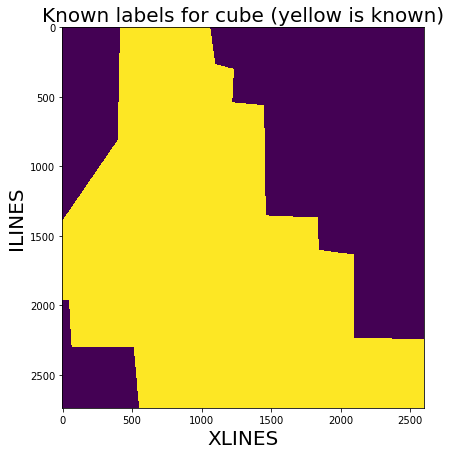

In [14]:
ds.show_labels(ds.indices[0])

In [15]:
demo_pipeline = (Pipeline()
                 .load_component(src=[D('geometries'), D('labels')],
                                 dst=['geometries', 'labels'])
                 .crop(points=L(ds.sampler.sample, 16),
                       shape=[3, 512, 512])
                 .load_cubes(dst='data_crops')
                 .create_masks(dst='mask_crops')
                 .scale(mode='normalize', src='data_crops')
                 )

demo_batch = (demo_pipeline << ds).next_batch(1, n_epochs=None)

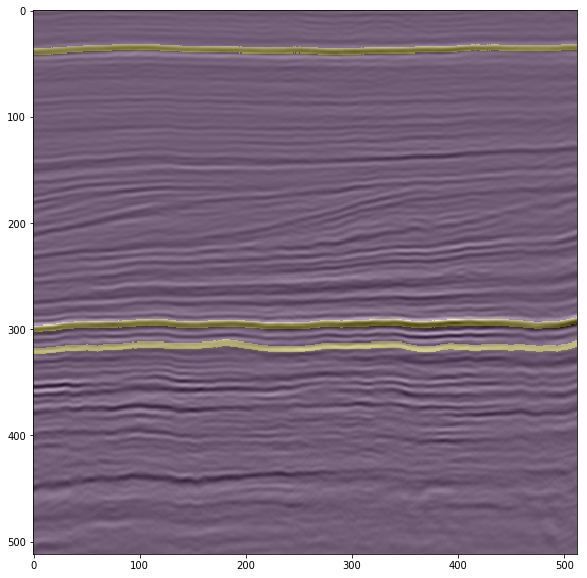

In [16]:
c = 15
plt.figure(figsize=(20,10))
plt.imshow(demo_batch.data_crops[c][0, :, :].T, cmap='gray')
plt.imshow(demo_batch.mask_crops[c][0, :, :].T, alpha=0.3)
plt.show()

Almost all of the horizons are very plain, and data from this cube does not generalize very well to the others.

<a id='cube_vu'></a>
# Cube VU_ONGMK

In [17]:
%%time
path_data = '/notebooks/SEISMIC_DATA/CUBE_VUONGMK/Repaired_cube.hdf5'

dsi = FilesIndex(path=[path_data], no_ext=True)
ds = SeismicCubeset(dsi)

paths_txt = {ds.indices[0]: glob('/notebooks/SEISMIC_DATA/CUBE_VUONGMK/HORIZONTS/*')}

ds = (ds.load_geometries()
        .load_point_clouds(paths = paths_txt)
        .load_labels()
        .load_samplers()
      )
# ~35 seconds

CPU times: user 22.9 s, sys: 2.32 s, total: 25.2 s
Wall time: 30.1 s


In [18]:
geometry = ds.geometries[ds.indices[0]]

print('Info for cube: {}'.format(geometry.path))
print('Time delay: {}'.format(geometry.delay))
print('Sample rate: {}'.format(geometry.sample_rate))

print('ILINES range from {} to {}'.format(min(geometry.ilines), max(geometry.ilines)))
print('ILINES range from {} to {}'.format(min(geometry.xlines), max(geometry.xlines)))
print('CDP_X range from {} to {}'.format(min(geometry.cdp_x), max(geometry.cdp_x)))
print('CDP_X range from {} to {}'.format(min(geometry.cdp_y), max(geometry.cdp_y)))

print('Cube shape (ilines, xlines, height) is: {}'.format(geometry.cube_shape))

Info for cube: /notebooks/SEISMIC_DATA/CUBE_VUONGMK/Repaired_cube.hdf5
Time delay: -280
Sample rate: 4
ILINES range from 1001 to 2472
ILINES range from 5001 to 6380
CDP_X range from 370563 to 405038
CDP_X range from 5712742 to 5731129
Cube shape (ilines, xlines, height) is: [1472, 1380, 1071]


Showing labels from above for Repaired_cube


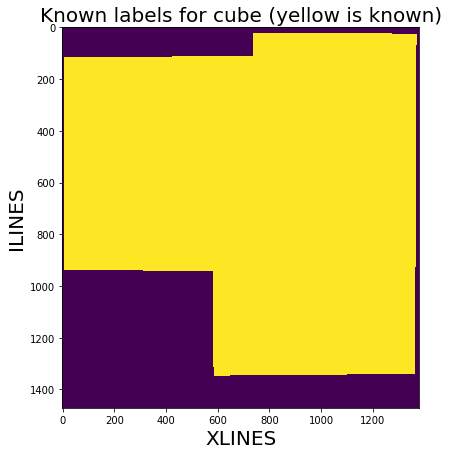

In [19]:
ds.show_labels(ds.indices[0])

In [20]:
demo_pipeline = (Pipeline()
                 .load_component(src=[D('geometries'), D('labels')],
                                 dst=['geometries', 'labels'])
                 .crop(points=L(ds.sampler.sample, 16),
                       shape=[3, 512, 512])
                 .load_cubes(dst='data_crops')
                 .create_masks(dst='mask_crops')
                 .scale(mode='normalize', src='data_crops')
                 )

demo_batch = (demo_pipeline << ds).next_batch(1, n_epochs=None)

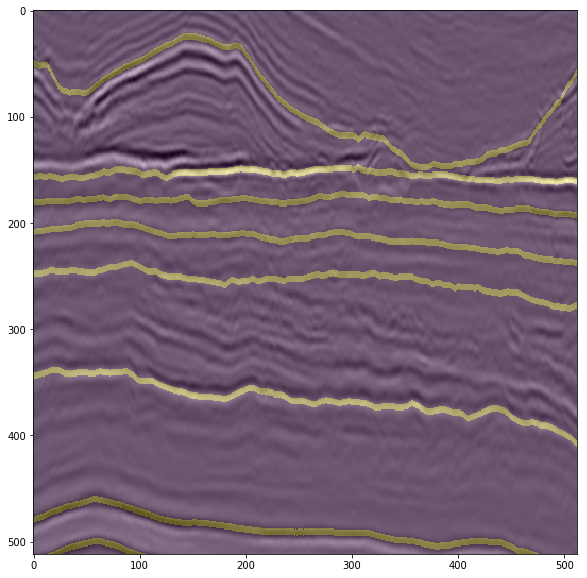

In [21]:
c = 10
plt.figure(figsize=(20,10))
plt.imshow(demo_batch.data_crops[c][0, :, :].T, cmap='gray')
plt.imshow(demo_batch.mask_crops[c][0, :, :].T, alpha=0.3)
plt.show()

Labels for this cube contain not only most visible horizons (like for others), but also outlines for different structures (e.g. salt). This cube has a good ratio between cube and labels sizes, but quality of labelling is lacking, as evident on the picture above.